In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_score, recall_score, f1_score, accuracy_score

### Held-Out Evaluation

In [2]:
predict = pd.read_csv('predict/data_v4/cnn_def/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_ent = pd.read_csv('predict/data_v4/cnn_defent/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_base = pd.read_csv('predict/data_v4/cnn_nodef/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_pcnn_ent = pd.read_csv('predict/data_v4/pcnn_defent/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)

In [3]:
# Calculate model performance
label = np.array(predict['label'], dtype=int)
label_scores = np.array(predict['dist'])
precision, recall, thresholds = precision_recall_curve(label, label_scores)

label_ent = np.array(predict_ent['label'], dtype=int)
label_scores_ent = np.array(predict_ent['dist'])
precision_ent, recall_ent, thresholds_ent = precision_recall_curve(label_ent, label_scores_ent)

label_pcnn_ent = np.array(predict_pcnn_ent['label'], dtype=int)
label_scores_pcnn_ent = np.array(predict_pcnn_ent['dist'])
precision_pcnn_ent, recall_pcnn_ent, thresholds_pcnn_ent = precision_recall_curve(label_pcnn_ent, label_scores_pcnn_ent)

# Calculate baseline performance
label_base = np.array(predict_base['label'], dtype=int)
label_scores_base = np.array(predict_base['dist'])
precision_base, recall_base, thresholds_base = precision_recall_curve(label_base, label_scores_base)

<Figure size 432x288 with 0 Axes>

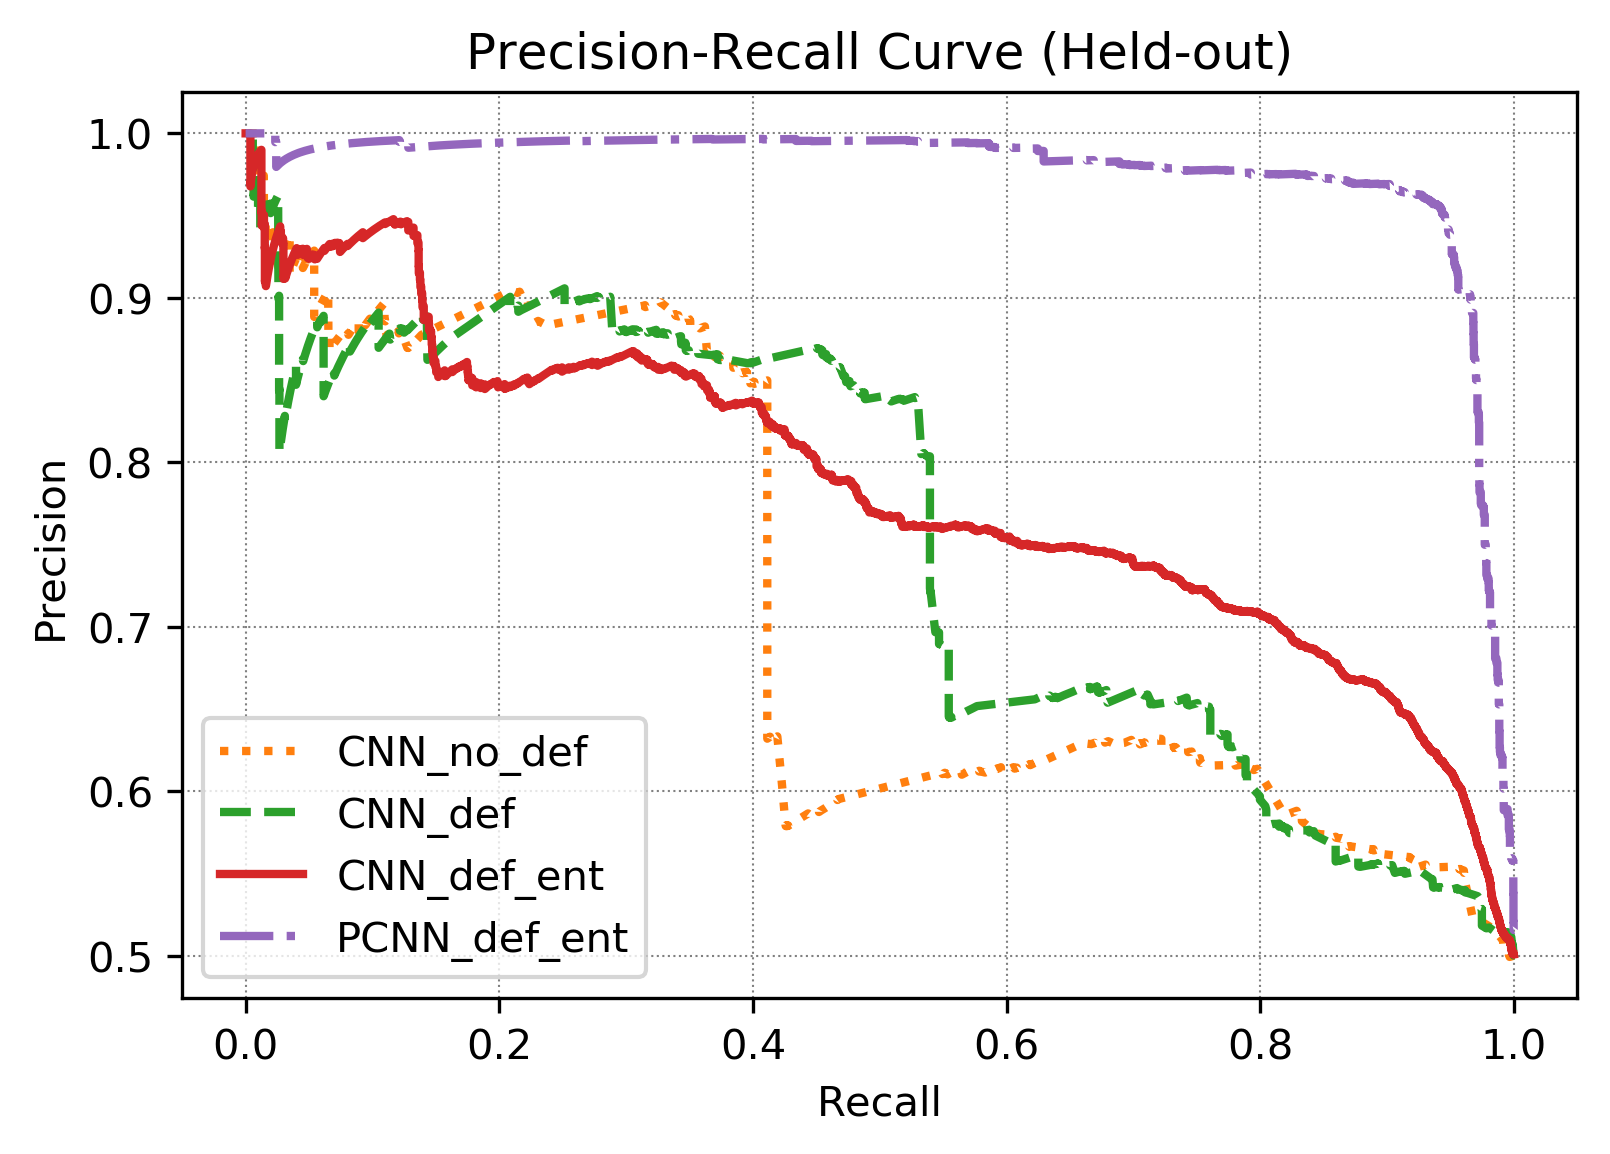

In [4]:
# Plot Precision-Recall curve
plt.clf()
plt.figure(dpi=300)
plt.plot(recall_base, precision_base, lw=2, color='C1', ls=':', label='CNN_no_def')
plt.plot(recall, precision, lw=2, color='C2', ls='--', label='CNN_def')
plt.plot(recall_ent, precision_ent, lw=2, color='C3', ls='-', label='CNN_def_ent')
plt.plot(recall_pcnn_ent, precision_pcnn_ent, lw=2, color='C4', ls='-.', label='PCNN_def_ent')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Held-out)')
plt.grid(color='grey', lw=0.5, linestyle='dotted')
plt.legend(loc='lower left')
plt.show()

In [5]:
average_precision_score(label_base, label_scores_base), average_precision_score(label, label_scores), average_precision_score(label_ent, label_scores_ent), average_precision_score(label_pcnn_ent, label_scores_pcnn_ent)

(0.7190488760746669,
 0.7541802073678624,
 0.7845228908925672,
 0.9770099080638897)

### Manual Evaluation

In [6]:
predict_g = pd.read_csv('predict/data_v4/gold/cnn_def/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_ent_g = pd.read_csv('predict/data_v4/gold/cnn_defent/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_base_g = pd.read_csv('predict/data_v4/gold/cnn_nodef/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_pcnn_ent_g = pd.read_csv('predict/data_v4/gold/pcnn_defent/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)

In [7]:
# Calculate model performance
label_g = np.array(predict_g['label'], dtype=int)
label_scores_g = np.array(predict_g['dist'])
precision_g, recall_g, thresholds_g = precision_recall_curve(label_g, label_scores_g)

label_ent_g = np.array(predict_ent_g['label'], dtype=int)
label_scores_ent_g = np.array(predict_ent_g['dist'])
precision_ent_g, recall_ent_g, thresholds_ent_g = precision_recall_curve(label_ent_g, label_scores_ent_g)

label_pcnn_ent_g = np.array(predict_pcnn_ent_g['label'], dtype=int)
label_scores_pcnn_ent_g = np.array(predict_pcnn_ent_g['dist'])
precision_pcnn_ent_g, recall_pcnn_ent_g, thresholds_pcnn_ent_g = precision_recall_curve(label_pcnn_ent_g, label_scores_pcnn_ent_g)

# Calculate baseline performance
label_base_g = np.array(predict_base_g['label'], dtype=int)
label_scores_base_g = np.array(predict_base_g['dist'])
precision_base_g, recall_base_g, thresholds_base_g = precision_recall_curve(label_base_g, label_scores_base_g)

<Figure size 432x288 with 0 Axes>

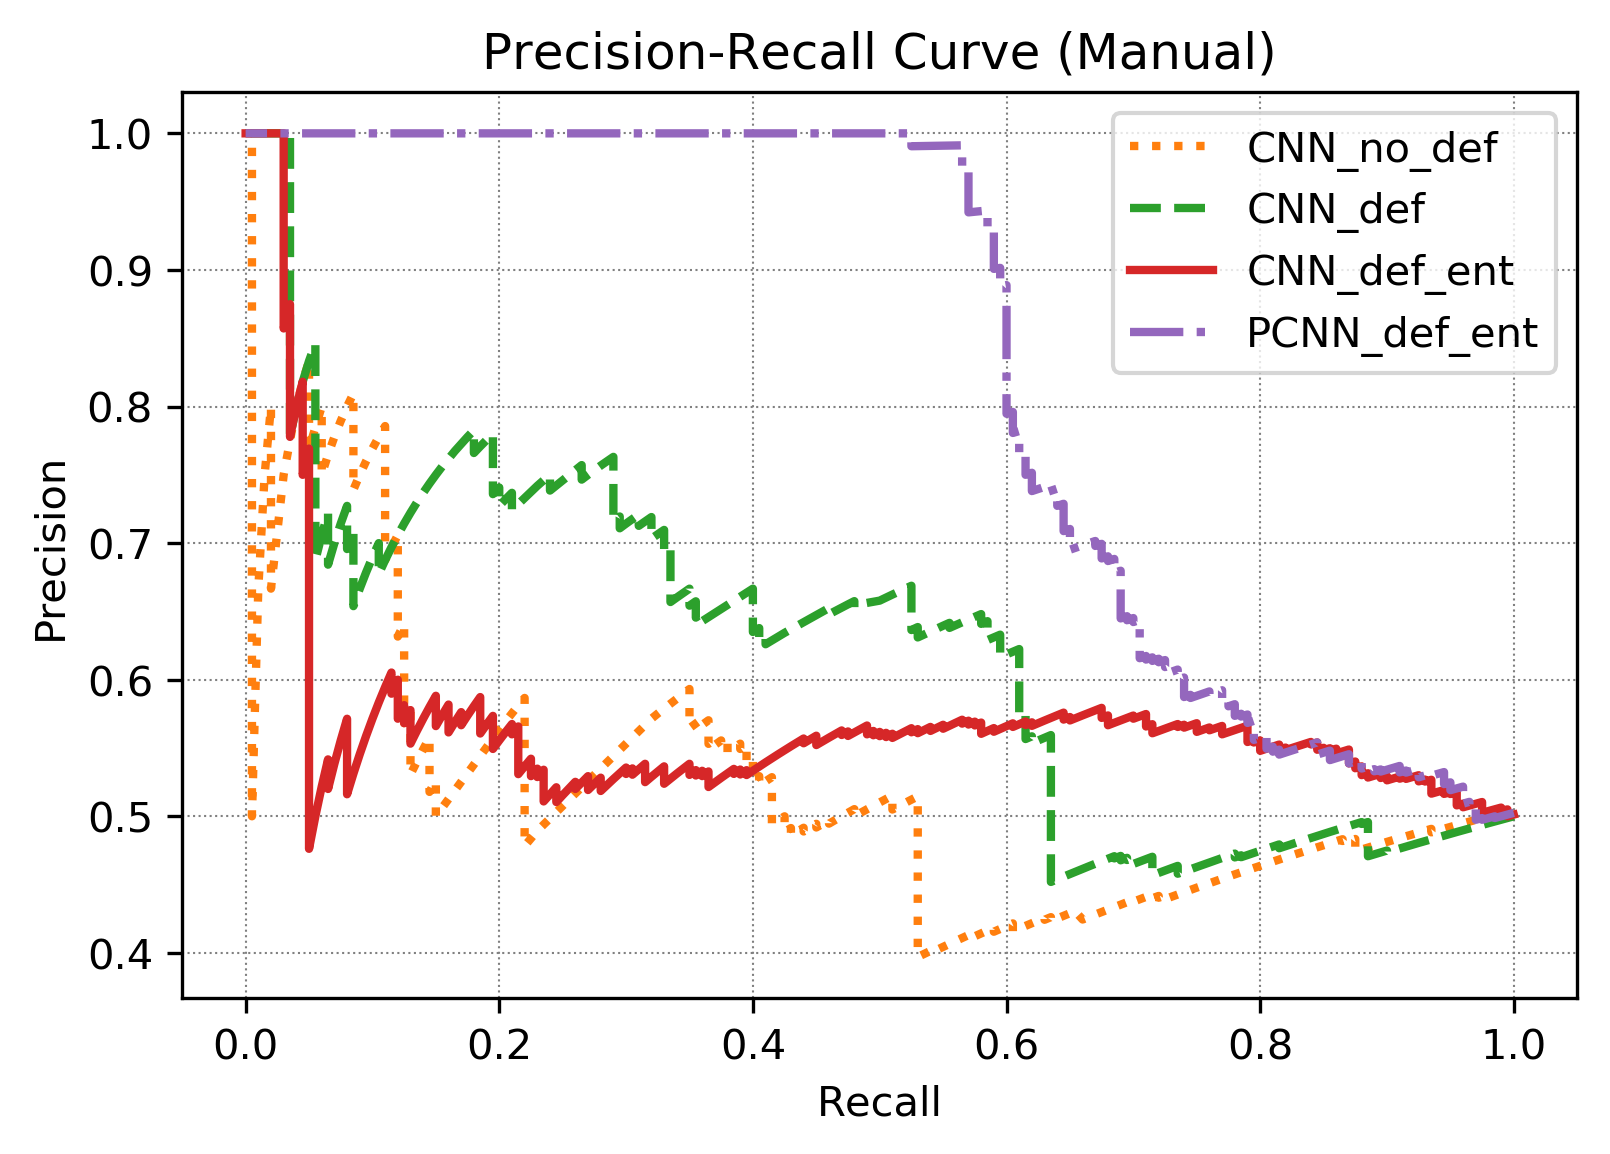

In [8]:
# Plot Precision-Recall curve
plt.clf()
plt.figure(dpi=300)
plt.plot(recall_base_g, precision_base_g, lw=2, color='C1', ls=':', label='CNN_no_def')
plt.plot(recall_g, precision_g, lw=2, color='C2', ls='--', label='CNN_def')
plt.plot(recall_ent_g, precision_ent_g, lw=2, color='C3', ls='-', label='CNN_def_ent')
plt.plot(recall_pcnn_ent_g, precision_pcnn_ent_g, lw=2, color='C4', ls='-.', label='PCNN_def_ent')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Manual)')
plt.grid(color='grey', lw=0.5, linestyle='dotted')
plt.legend(loc='upper right')
plt.show()

In [9]:
average_precision_score(label_base_g, label_scores_base_g), average_precision_score(label_g, label_scores_g), average_precision_score(label_ent_g, label_scores_ent_g), average_precision_score(label_pcnn_ent_g, label_scores_pcnn_ent_g)

(0.5325918793439446,
 0.6245274307256393,
 0.5700012477270268,
 0.8349896470517193)

### Decision Threshold

In [12]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    prec = precisions[:-1]
    rec = recalls[:-1]
    plt.figure(dpi=300)
    plt.grid(color='grey', lw=0.5, linestyle='dotted')
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, prec, "b--", label="Precision")
    plt.plot(thresholds, rec, "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

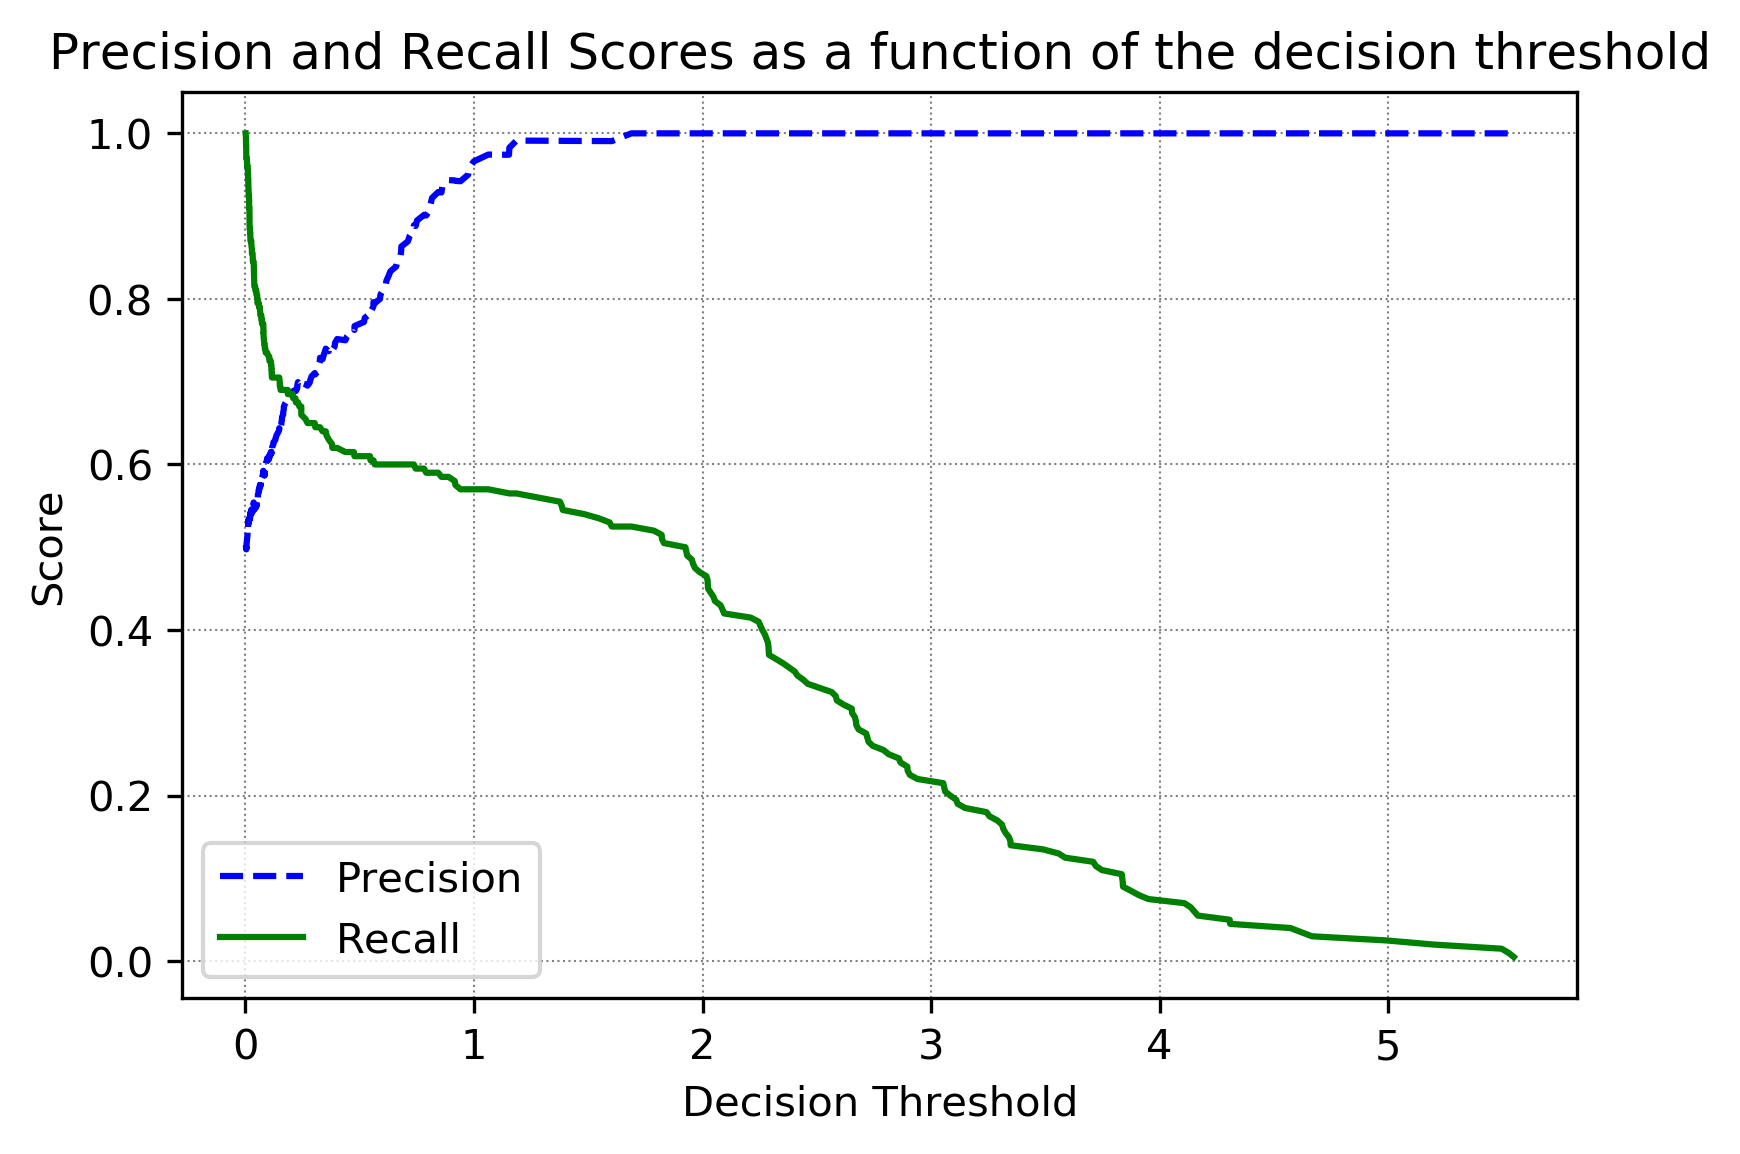

In [13]:
plot_precision_recall_vs_threshold(precision_pcnn_ent_g, recall_pcnn_ent_g, thresholds_pcnn_ent_g)

In [14]:
def get_threshold(precisions, recalls, thresholds):
    idx = np.argwhere(np.diff(np.sign(precisions[:-1] - recalls[:-1]))).flatten()
    return thresholds[idx][0]

In [15]:
get_threshold(precision_pcnn_ent_g, recall_pcnn_ent_g, thresholds_pcnn_ent_g)

0.1871112287044525

### Reformat Aligment Result

In [56]:
data_header = ['e1_kb', 'rel_kb', 'rel_id', 'e2_kb', 'e1_oie', 'rel_oie', 'e2_oie',
               'e1_kb_id', 'e2_kb_id', 'e1_oie_id', 'e2_oie_id',
               'e1_oie_root', 'e2_oie_root', 'gold_label']
test_align = pd.read_csv('dataset/test_align_gold.tsv', sep='\t', header=None, names=data_header)
test_align.drop(['e1_kb_id', 'e2_kb_id', 'e1_oie_id', 'e2_oie_id', 'e1_oie_root', 'e2_oie_root'], axis=1, inplace=True)

test_align['dist_cnn_no_def'] = predict_base_g['dist']
test_align['dist_cnn_def'] = predict_g['dist']
test_align['dist_cnn_def_ent'] = predict_ent_g['dist']
test_align['dist_pcnn_def_ent'] = predict_pcnn_ent_g['dist']

t_cnn_no_def = get_threshold(precision_base, recall_base, thresholds_base)
t_cnn_def = get_threshold(precision, recall, thresholds)
t_cnn_def_ent = get_threshold(precision_ent, recall_ent, thresholds_ent)
t_pcnn_def_ent = get_threshold(precision_pcnn_ent, recall_pcnn_ent, thresholds_pcnn_ent)

test_align['pred_cnn_no_def'] = [0 if d <= t_cnn_no_def else 1 for d in test_align['dist_cnn_no_def']]
test_align['pred_cnn_def'] = [0 if d <= t_cnn_def else 1 for d in test_align['dist_cnn_def']]
test_align['pred_cnn_def_ent'] = [0 if d <= t_cnn_def_ent else 1 for d in test_align['dist_cnn_def_ent']]
test_align['pred_pcnn_def_ent'] = [0 if d <= t_pcnn_def_ent else 1 for d in test_align['dist_pcnn_def_ent']]

test_align = test_align[[
                'e1_kb', 'rel_kb', 'rel_id', 'e2_kb', 'e1_oie', 'rel_oie', 'e2_oie',
                'dist_cnn_no_def', 'dist_cnn_def', 'dist_cnn_def_ent', 'dist_pcnn_def_ent',
                'pred_cnn_no_def', 'pred_cnn_def', 'pred_cnn_def_ent', 'pred_pcnn_def_ent',
                'gold_label']]

In [57]:
test_align

,e1_kb,rel_kb,rel_id,e2_kb,e1_oie,rel_oie,e2_oie,dist_cnn_no_def,dist_cnn_def,dist_cnn_def_ent,dist_pcnn_def_ent,pred_cnn_no_def,pred_cnn_def,pred_cnn_def_ent,pred_pcnn_def_ent,gold_label
0,Matilda,author,P50,Roald Dahl,Matilda,is book by,British writer Roald Dahl,0.742674,0.294419,0.092718,0.054096,1,0,0,0,0
1,Odes,author,P50,Horace,Odes,are collection in,four books,0.775690,0.605861,1.946205,1.822580,1,0,1,1,1
2,Taxi,cast member,P161,Gisele BÃƒÂ¼ndchen,Taxi,starring,Gisele BÃƒÂ¼ndchen,0.218558,0.246020,2.906664,0.010774,0,0,1,0,0
3,Casino,cast member,P161,Joe Pesci,Casino,starring,Joe Pesci,0.218558,0.246020,4.589404,0.028328,0,0,1,0,0
4,Nadine,cast member,P161,Kim Basinger,Nadine,starring,Kim Basinger,0.218558,0.246020,0.474292,0.006341,0,0,0,0,0
5,Heroes,cast member,P161,Salman Khan,Heroes,starring,Salman Khan,0.218558,0.246020,4.026847,0.002831,0,0,1,0,0
6,Shopgirl,cast member,P161,Steve Martin,Shopgirl,starring,Steve Martin,0.218558,0.246020,0.328195,0.011442,0,0,0,0,0
7,Renegades,cast member,P161,Kiefer Sutherland,Renegades,starring,Kiefer Sutherland,0.218558,0.246020,0.449777,0.008834,0,0,0,0,0
8,Rhetoric,author,P50,Aristotle,Rhetoric,is,Greek,0.317837,0.450472,0.115559,1.958513,0,0,0,1,1
9,Turkmenistan,capital,P36,Ashgabat,Ashgabat,named,Poltoratsk,0.852414,2.836151,1.847865,3.325832,1,1,1,1,1


In [58]:
eval_table = pd.DataFrame(index=['CNN_no_def', 'CNN_def', 'CNN_def_ent', 'PCNN_def_ent'])
eval_table = eval_table.fillna(0) # with 0s rather than NaNs

In [61]:
indexes = [
    ('dist_cnn_no_def', 'pred_cnn_no_def', 'CNN_no_def'),
    ('dist_cnn_def', 'pred_cnn_def', 'CNN_def'),
    ('dist_cnn_def_ent', 'pred_cnn_def_ent', 'CNN_def_ent'),
    ('dist_pcnn_def_ent', 'pred_pcnn_def_ent', 'PCNN_def_ent')
]

rel = 200

for i in indexes:
    test_align = test_align.sort_values(by=i[0])
    pred_label = i[1]
    index = i[2]

    gold = list(test_align['gold_label'])
    pred = list(test_align[pred_label])
    
    y_pred_100 = pred[:100]
    corr_pred_100 = 0 
    for i in range(100):
        if y_pred_100[i] == 0 and y_pred_100[i] == gold[i]:
            corr_pred_100 += 1
    
    y_pred_200 = pred[:200]
    corr_pred_200 = 0 
    for i in range(200):
        if y_pred_200[i] == 0 and y_pred_200[i] == gold[i]:
            corr_pred_200 += 1
    
    y_pred_400 = pred[:400]
    corr_pred_400 = 0 
    for i in range(400):
        if y_pred_400[i] == 0 and y_pred_400[i] == gold[i]:
            corr_pred_400 += 1
    
    eval_table.at[index, 'p@100'] = corr_pred_100 / rel
    eval_table.at[index, 'p@200'] = corr_pred_200 / rel
    eval_table.at[index, 'p@400'] = corr_pred_400 / rel
    
    eval_table.at[index, 'acc'] = accuracy_score(gold, pred)
    eval_table.at[index, 'prec'] = precision_score(gold, pred)
    eval_table.at[index, 'rec'] = recall_score(gold, pred)
    eval_table.at[index, 'f1'] = f1_score(gold, pred)

In [62]:
eval_table

,p@100,p@200,p@400,acc,prec,rec,f1
CNN_no_def,0.140,0.150,0.150,0.3800,0.417808,0.610,0.495935
CNN_def,0.200,0.230,0.230,0.4525,0.467128,0.675,0.552147
CNN_def_ent,0.325,0.545,0.545,0.5675,0.564593,0.590,0.577017
PCNN_def_ent,0.320,0.685,0.985,0.7775,0.974359,0.570,0.719243


### Visualize Embedding

In [32]:
rel_vector = pd.read_csv('predict/data_v3/pcnn_oie_def_ent_root/rel_embed_vector.tsv', sep='\t', header=None, names=['el1', 'el2'])
data_header = ['e1_kb', 'rel_kb', 'rel_id', 'e2_kb', 'e1_oie', 'rel_oie', 'e2_oie',
               'e1_kb_id', 'e2_kb_id', 'e1_oie_id', 'e2_oie_id',
               'e1_oie_root', 'e2_oie_root', 'label']
test_align = pd.read_csv('dataset/test_align_filtered_balanced.tsv', sep='\t', header=None, names=data_header)
rel_label = test_align['rel_oie']
rel_label_unique = pd.read_csv('predict/data_v3/pcnn_oie_def_ent_root/rel_embed_label.tsv', sep='\t', header=None, names=['label'])
rel_label_unique = rel_label_unique.drop_duplicates()

In [33]:
rel_label[0]

'are'

In [34]:
vector_x = []
vector_y = []
for index, row in rel_label_unique.iterrows():
    vector_x.append(rel_vector['el1'][index])
    vector_y.append(rel_vector['el2'][index])

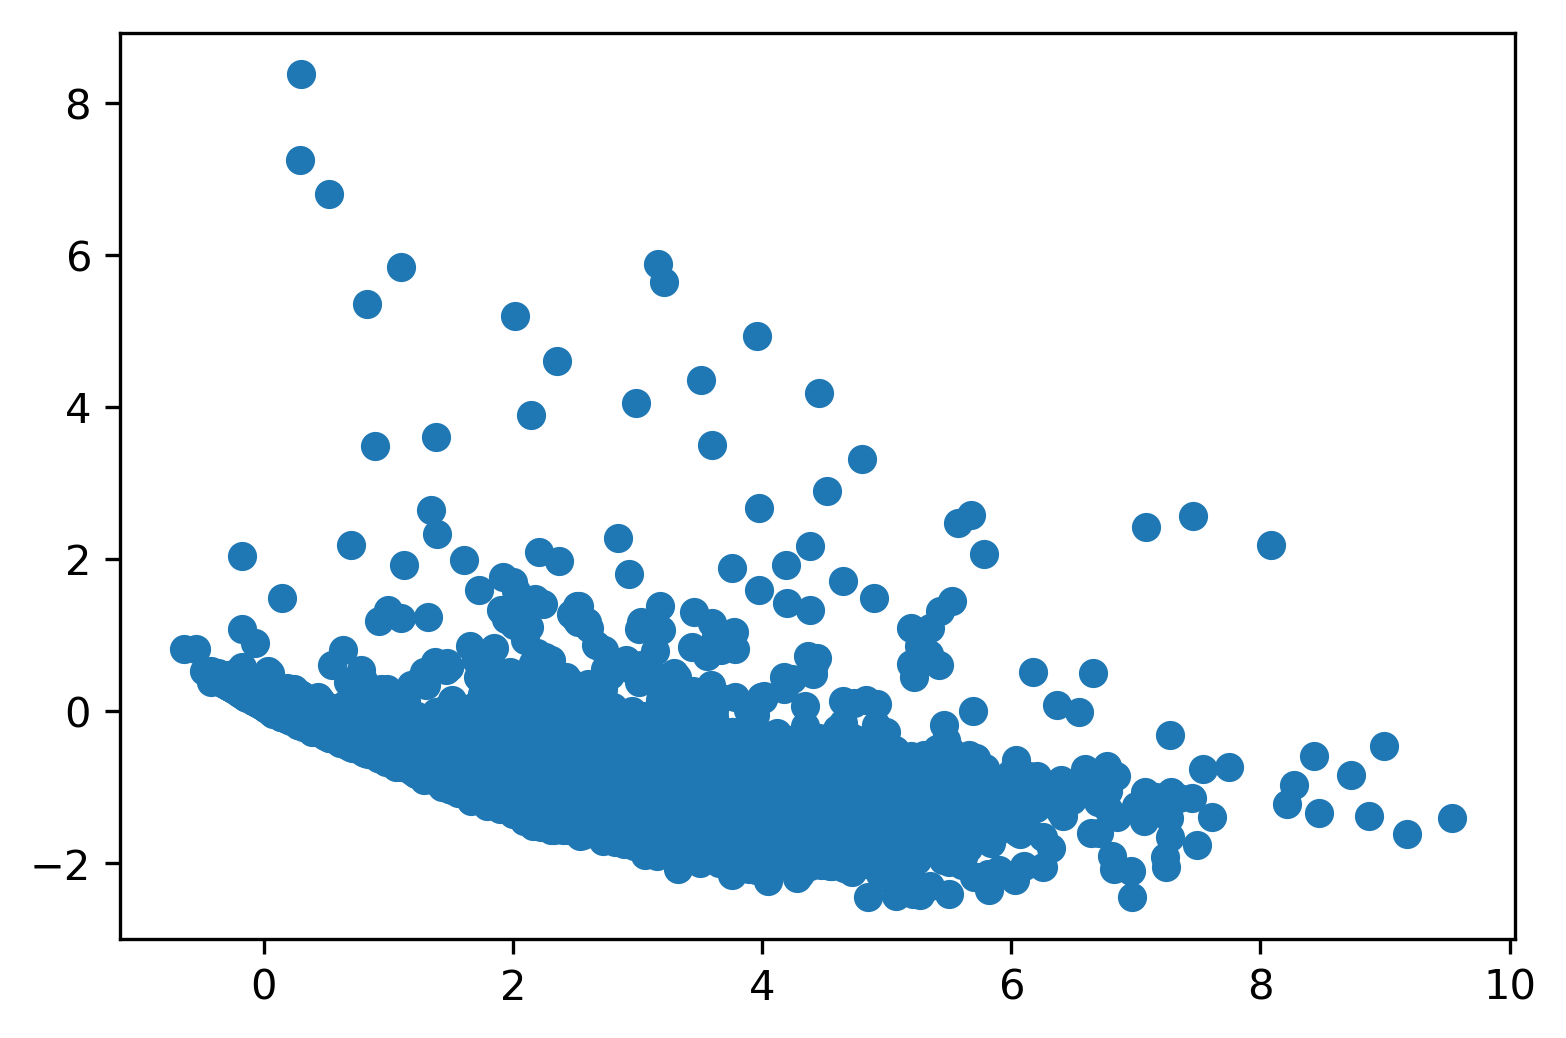

In [35]:
fig, ax = plt.subplots(dpi=300)
# plt.ylim((-1.75, 2.25))
# plt.xlim((-2.25, 1.75))
ax.scatter(vector_x, vector_y)

In [40]:
vector_x = []
vector_y = []
label = []
observed_label = ['was daughter of', 'was son of',
                  #'are languages of', 'are official languages of', 'is spoken in',
                  #'is nation in', 'is state in', 'is country in'
                 ]
for index, row in rel_label_unique.iterrows():
    label_txt = rel_label[index]
    if label_txt in observed_label:
        label.append(label_txt)
        vector_x.append(rel_vector['el1'][index])
        vector_y.append(rel_vector['el2'][index])

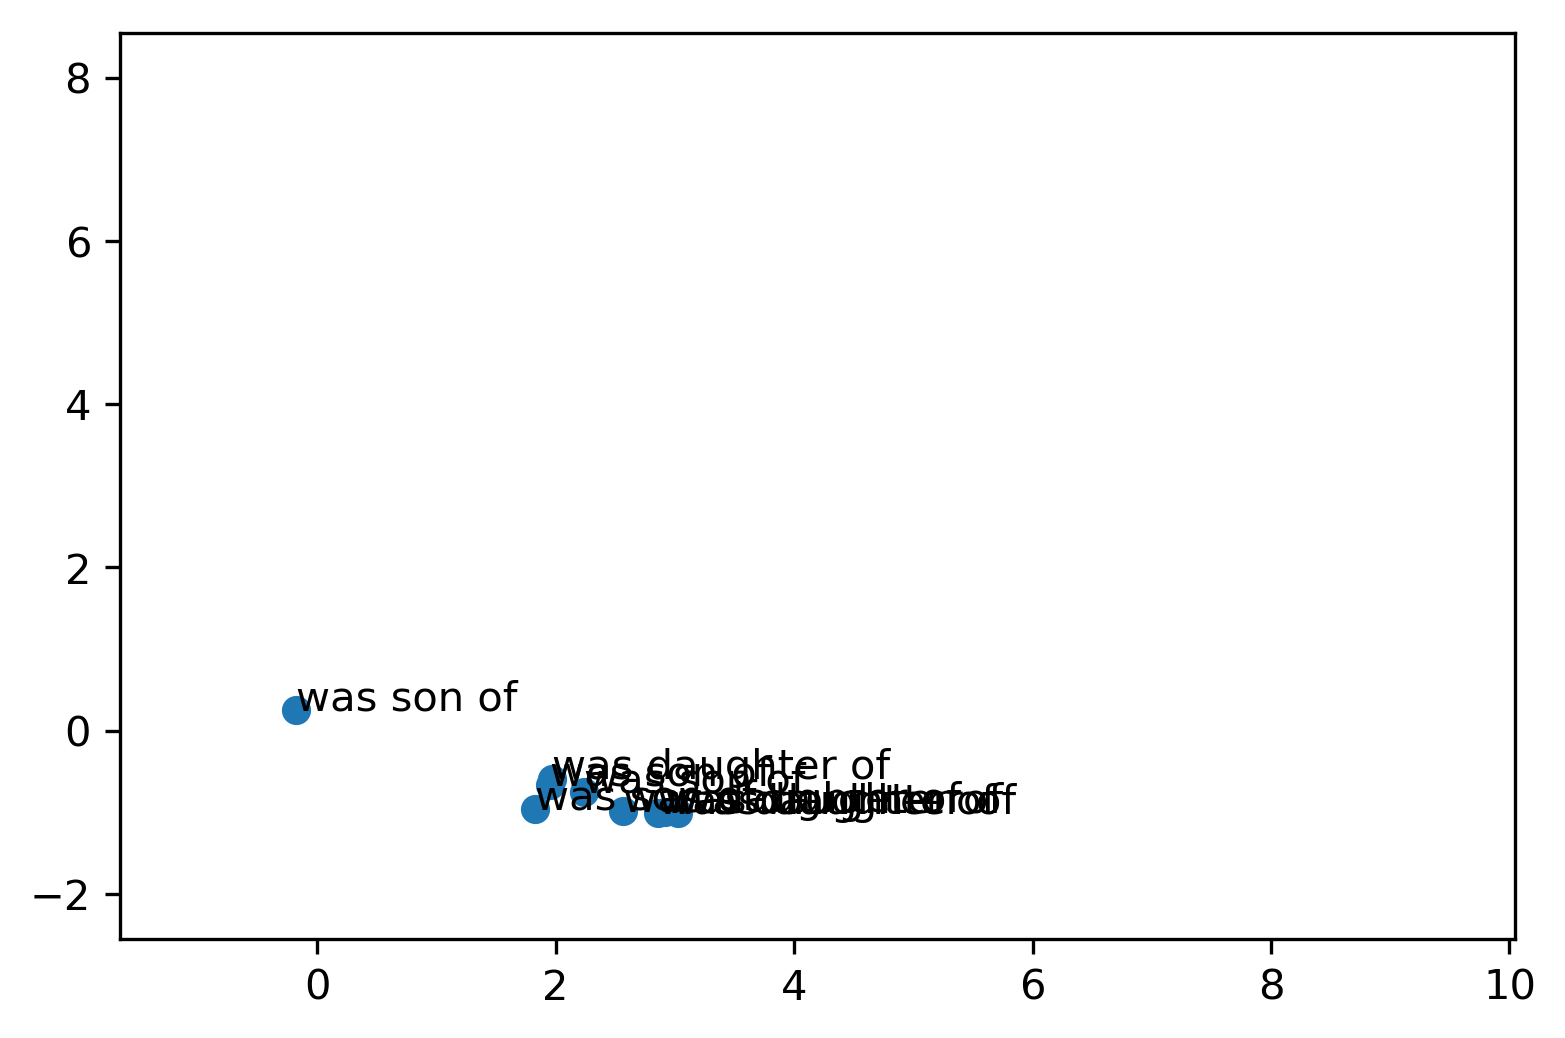

In [41]:
fig, ax = plt.subplots(dpi=300)
ax.scatter(vector_x, vector_y)
plt.ylim((-2.55, 8.55))
plt.xlim((-1.65, 10.05))

for i, txt in enumerate(label):
    ax.annotate(txt, (vector_x[i], vector_y[i]))

### Relation Coverage

In [32]:
rel_predict = pd.read_csv('predict/oie_def_ent_root/predict_result_sort.tsv', sep='\t', header=None, names=['rel_kb', 'rel_oie', 'label'])
rel_predict_0 = rel_predict[rel_predict.label != 1]
rel_predict_1 = rel_predict[rel_predict.label != 0]
rel_oie_0 = set(rel_predict_0['rel_oie'])
rel_oie_1 = set(rel_predict_1['rel_oie'])

In [33]:
rel_oie_0

{"'s Meckler is",
 "'s business is",
 "'s capital is",
 "'s city is",
 "'s father is",
 "'s parents is",
 "'s settlement is",
 "'s son is",
 'Additionally has system in',
 'Bevillard in',
 'Compared to',
 'Council of',
 'Due to',
 'Economically is city in',
 'Economically is most prosperous city in',
 'Economically is prosperous city in',
 'Formerly owned by',
 'Further developments of were',
 'Governor of',
 'However is corrupt country in',
 'However is country in',
 'However is most corrupt country in',
 'However is still corrupt country in',
 'However is still country in',
 'However is still most corrupt country in',
 'King of',
 'Located in',
 'Monarchy of',
 "Museum 's",
 'Originating in',
 'Phantom of',
 'Republic of',
 'University of',
 'accompanies',
 'acquire',
 'administrative center in',
 'adopted',
 'advocated',
 'advocated as late',
 'advocated late',
 'airport in',
 'allowing',
 'also appeared as',
 'also called',
 'also gave',
 'also run education courses in',
 'appeared

In [34]:
uncovered_rel = set([x for x in rel_oie_1 if x not in rel_oie_0])

In [35]:
uncovered_rel

{'Additionally is heartland of',
 'Eventually discovered',
 'Following',
 'Founded as',
 'General of',
 'Helen of',
 'However was moved to',
 'Later was released as',
 'Owing to',
 'Portuguese for',
 'Trained in',
 'acquired',
 'acquired position in',
 'addition to',
 'administered by',
 'after',
 'agreed',
 'along were ceded',
 'along were ceded to',
 'also hosts',
 'also ran agency from',
 'also ran from',
 'also restored',
 'apprentice alongside',
 'are Among',
 'are collection by',
 'are flat lengths of',
 'are from',
 'are languages of',
 'are latest of',
 'are lengths of',
 'are official languages of',
 'are popular uses of',
 'are uses of',
 'arguably stood as',
 'at',
 'at Challenge is',
 'attended',
 'be home to',
 'be released as',
 'be understood as',
 'becomes',
 'becoming',
 'been',
 'began',
 'began Following',
 'being',
 'being constructed near',
 'bore son to',
 'born to',
 'bought majority through',
 'built',
 'came',
 'came in',
 'center for',
 'changed name to',
 'ch

In [37]:
len(uncovered_rel), len(set(rel_predict['rel_oie']))

(408, 1030)

In [38]:
with open('predict/oie_def/uncovered_oie_rel.txt', 'w') as f:
    for item in uncovered_rel:
        f.write("%s\n" % item)